In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import time
import matplotlib as mpl
import sys
from datetime import datetime
from time import mktime, strptime
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
#Jupyter notebook to generate Figure 3A, B, C in AFRICA_75K manuscript.
#Written by MCotten, MyVTPhan as part of the Wellcome Trust funded AFRICO19 project

In [2]:
#Import data
outprefix = "Africa_to_28Jan22_Ncounts"
df1 = pd.read_csv('Africa_to28Jan22_plus_pango_countNs.csv', sep=",", na_values=['-'])
df1

,genome_id,N_count
0,EPI_ISL_8525441|Senegal|2020-03-18|2022-01-10|...,1171
1,EPI_ISL_8525457|Senegal|2020-03-24|2022-01-10|...,742
2,EPI_ISL_8526146|Senegal|2021-06-26|2022-01-10|...,7030
3,EPI_ISL_8525943|Senegal|2020-12-06|2022-01-10|...,1364
4,EPI_ISL_8525882|Senegal|2020-10-02|2022-01-10|...,738
...,...,...
74756,EPI_ISL_845554|Cameroon|2020-10-26|2021-01-18|...,0
74757,EPI_ISL_7120441|RepublicoftheCongo|2021-05-19|...,2292
74758,EPI_ISL_7120484|RepublicoftheCongo|2021-06-02|...,3358
74759,EPI_ISL_1273392|Lesotho|2020-11-26|2021-03-18|...,1174


In [3]:
epidemic_month_dictionary ={"2020-03":1,
"2020-04":2,
"2020-05":3,
"2020-06":4,
"2020-07":5,
"2020-08":6,
"2020-09":7,
"2020-10":8,
"2020-11":9,
"2020-12":10,
"2021-01":11,
"2021-02":12,
"2021-03":13,
"2021-04":14,
"2021-05":15,
"2021-06":16,
"2021-07":17,
"2021-08":18,
"2021-09":19,
"2021-10":20,
"2021-11":21,
"2021-12":22,
"2022-01":23}

In [4]:
#technology used
dfTech = pd.read_csv('Africa_75K_technology_table.csv', sep=",", na_values=['-'])
original_list = dfTech['listed_technology'].tolist()
simple_list = dfTech['simple_tech'].tolist()
tech_dict = dict(zip(original_list, simple_list))
tech_dict

{'GenomeDetective1.132': 'Not_listed',
 'Illumina': 'Illumina',
 'IlluminaHiSeq': 'Illumina',
 'IlluminaHiseq': 'Illumina',
 'IlluminaiSeq': 'Illumina',
 'IlluminaiSeq-100': 'Illumina',
 'IlluminaIseq100': 'Illumina',
 'IlluminaiSeq100': 'Illumina',
 'IlluminaMiniSeq': 'Illumina',
 'IlluminaMiSeq': 'Illumina',
 'IlluminaMiseq': 'Illumina',
 'illuminaMiseq': 'Illumina',
 'IlluminaMiSeq/Sanger': 'Illumina',
 'IlluminaMiSeqandIlluminaiSeq': 'Illumina',
 'IlluminaMiSeqandiSeq': 'Illumina',
 'IlluminaMiSeqDX': 'Illumina',
 'IlluminaMiSeqDx': 'Illumina',
 'IlluminaMiSeqMinION': 'Illumina',
 'IlluminaMiseqNanoporeMinION': 'Illumina',
 'IlluminaMiseqSanger': 'Illumina',
 'IlluminaNextSeq': 'Illumina',
 'IlluminaNextseq': 'Illumina',
 'IlluminaNextSeq2000': 'Illumina',
 'IlluminaNextSeq500': 'Illumina',
 'IlluminaNextSeq501': 'Illumina',
 'IlluminaNextSeq502': 'Illumina',
 'IlluminaNextSeq503': 'Illumina',
 'IlluminaNextSeq504': 'Illumina',
 'IlluminaNextSeq505': 'Illumina',
 'IlluminaNextSeq50

In [5]:
#primer_details
dfPrimers = pd.read_csv('Africa_Primers_13Dec21.csv', sep=",", na_values=['-'])
strain_list = dfPrimers['simple_strain'].tolist()
primer_list = dfPrimers['Primers_used'].tolist()
primer_dict = dict(zip(strain_list, primer_list))
primer_dict

{'AZ183': 'ARTIC_V2',
 'CA24': 'ARTIC_V2',
 'Sett44': 'ARTIC_V2',
 'TANG183': 'ARTIC_V2',
 'moh100': 'ARTIC_V2',
 'KRISP-MZ154276': 'ARTIC_V2',
 'KRISP-MZ154278': 'ARTIC_V2',
 'KRISP-MZ155093': 'ARTIC_V2',
 'KRISP-MZ157469': 'ARTIC_V2',
 'KRISP-MZ157470': 'ARTIC_V2',
 'KRISP-MZ158905': 'ARTIC_V2',
 'KRISP-MZ158971': 'ARTIC_V2',
 'KRISP-0001': 'ARTIC_V2',
 'KRISP-0016': 'ARTIC_V2',
 'KRISP-0017': 'ARTIC_V2',
 'KRISP-0019': 'ARTIC_V2',
 'KRISP-0021': 'ARTIC_V2',
 'KRISP-0024': 'ARTIC_V2',
 'KRISP-0026': 'ARTIC_V2',
 'KRISP-0028': 'ARTIC_V2',
 'KRISP-0029': 'ARTIC_V2',
 'KRISP-003': 'ARTIC_V2',
 'KRISP-0033': 'ARTIC_V2',
 'KRISP-0035': 'ARTIC_V2',
 'KRISP-0040': 'ARTIC_V2',
 'KRISP-0041': 'ARTIC_V2',
 'KRISP-005': 'ARTIC_V2',
 'KRISP-0055': 'ARTIC_V2',
 'KRISP-0056': 'ARTIC_V2',
 'KRISP-0057': 'ARTIC_V2',
 'KRISP-0058': 'ARTIC_V2',
 'KRISP-0059': 'ARTIC_V2',
 'KRISP-0065': 'ARTIC_V2',
 'KRISP-0066': 'ARTIC_V2',
 'KRISP-0067': 'ARTIC_V2',
 'KRISP-0074': 'ARTIC_V2',
 'KRISP-0075': 'ARTIC_V2

In [6]:
#add country dates technology columns

def extract_subm_date (row):
    id_pieces1= (row['genome_id']).split("|")    
    return id_pieces1[3]

def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[-1]

def extract_country (row):
    id_pieces3= (row['genome_id']).split("|")
    if str(id_pieces3[1])=="Uganda":
        if "UG" in (row['genome_id']).split("|")[4]:
            return "Uganda_WT"
        else:
            return "Uganda"
    elif str(id_pieces3[1])!="Uganda":
        return id_pieces3[1]    

def extract_technology (row):
    id_pieces4= (row['genome_id']).split("|")  
    return id_pieces4[-2]

def extract_simple_tech (row):
    id_pieces7= (row['genome_id']).split("|") 
    complex_tech_name = id_pieces7[-2]
    simple_tech = tech_dict.get(complex_tech_name, "None")
    return simple_tech

def extract_subm_month (row):
    id_pieces5= (row['genome_id']).split("|") 
    full_date =id_pieces5[3]
    date_pieces = full_date.split("-")
    if len(date_pieces)==3:
        return date_pieces[0]+"-"+date_pieces[1]
    else: 
        return "bad_date"

def extract_epidemic_month (row):
    id_pieces6= (row['genome_id']).split("|") 
    full_date =id_pieces6[3]
    date_pieces = full_date.split("-")
    if len(date_pieces)==3:
        subm_month = date_pieces[0]+"-"+date_pieces[1]
    else: 
        subm_month = "bad_date"
    epidemic_month = epidemic_month_dictionary.get(subm_month, "None") 
    return  epidemic_month

def extract_primers (row):
    id_pieces8= (row['genome_id']).split("|") 
    strain =id_pieces8[-3]
    primers_used = primer_dict.get(strain, "Not_listed") 
    return  primers_used

#Make column with genome_id from index                                    
df1['Lineage'] = df1.apply (lambda row: extract_lineage (row),axis=1)
# Extract specific features from contig ID
df1['Submission_date'] = df1.apply (lambda row: extract_subm_date (row),axis=1)
df1['Country'] = df1.apply (lambda row: extract_country (row),axis=1)
df1['Subm_month'] = df1.apply (lambda row: extract_subm_month (row),axis=1)
df1['Epidem_month'] = df1.apply (lambda row: extract_epidemic_month (row),axis=1)
df1['Technology'] = df1.apply (lambda row: extract_technology (row),axis=1)
df1['Simple_tech'] = df1.apply (lambda row: extract_simple_tech (row),axis=1)
df1['Primers_used'] = df1.apply (lambda row: extract_primers (row),axis=1)

df1

,genome_id,N_count,Lineage,Submission_date,Country,Subm_month,Epidem_month,Technology,Simple_tech,Primers_used
0,EPI_ISL_8525441|Senegal|2020-03-18|2022-01-10|...,1171,A,2022-01-10,Senegal,2022-01,23,IlluminaNextSeq550,Illumina,Not_listed
1,EPI_ISL_8525457|Senegal|2020-03-24|2022-01-10|...,742,A,2022-01-10,Senegal,2022-01,23,IlluminaNextSeq550,Illumina,Not_listed
2,EPI_ISL_8526146|Senegal|2021-06-26|2022-01-10|...,7030,A,2022-01-10,Senegal,2022-01,23,lluminaNextSeq550,Illumina,Not_listed
3,EPI_ISL_8525943|Senegal|2020-12-06|2022-01-10|...,1364,A,2022-01-10,Senegal,2022-01,23,IlluminaNextSeq550,Illumina,Not_listed
4,EPI_ISL_8525882|Senegal|2020-10-02|2022-01-10|...,738,A,2022-01-10,Senegal,2022-01,23,lluminaNextSeq550,Illumina,Not_listed
...,...,...,...,...,...,...,...,...,...,...
74756,EPI_ISL_845554|Cameroon|2020-10-26|2021-01-18|...,0,W.1,2021-01-18,Cameroon,2021-01,11,IlluminaMiseq,Illumina,Not_listed
74757,EPI_ISL_7120441|RepublicoftheCongo|2021-05-19|...,2292,XB,2021-12-03,RepublicoftheCongo,2021-12,22,NanoporeMinIONARTICprotocolMidnightprimers,ONT,Not_listed
74758,EPI_ISL_7120484|RepublicoftheCongo|2021-06-02|...,3358,XB,2021-12-03,RepublicoftheCongo,2021-12,22,NanoporeMinIONARTICprotocolMidnightprimers,ONT,Not_listed
74759,EPI_ISL_1273392|Lesotho|2020-11-26|2021-03-18|...,1174,XB,2021-03-18,Lesotho,2021-03,13,IlluminaNextseq,Illumina,Not_listed


In [7]:
month_order = ["2020-03",
"2020-04",
"2020-05",
"2020-06",
"2020-07",
"2020-08",
"2020-09",
"2020-10",
"2020-11",
"2020-12",
"2021-01",
"2021-02",
"2021-03",
"2021-04",
"2021-05",
"2021-06",
"2021-07",
"2021-08",
"2021-09",
"2021-10",
"2021-11",
"2021-12",
"2022-01"]

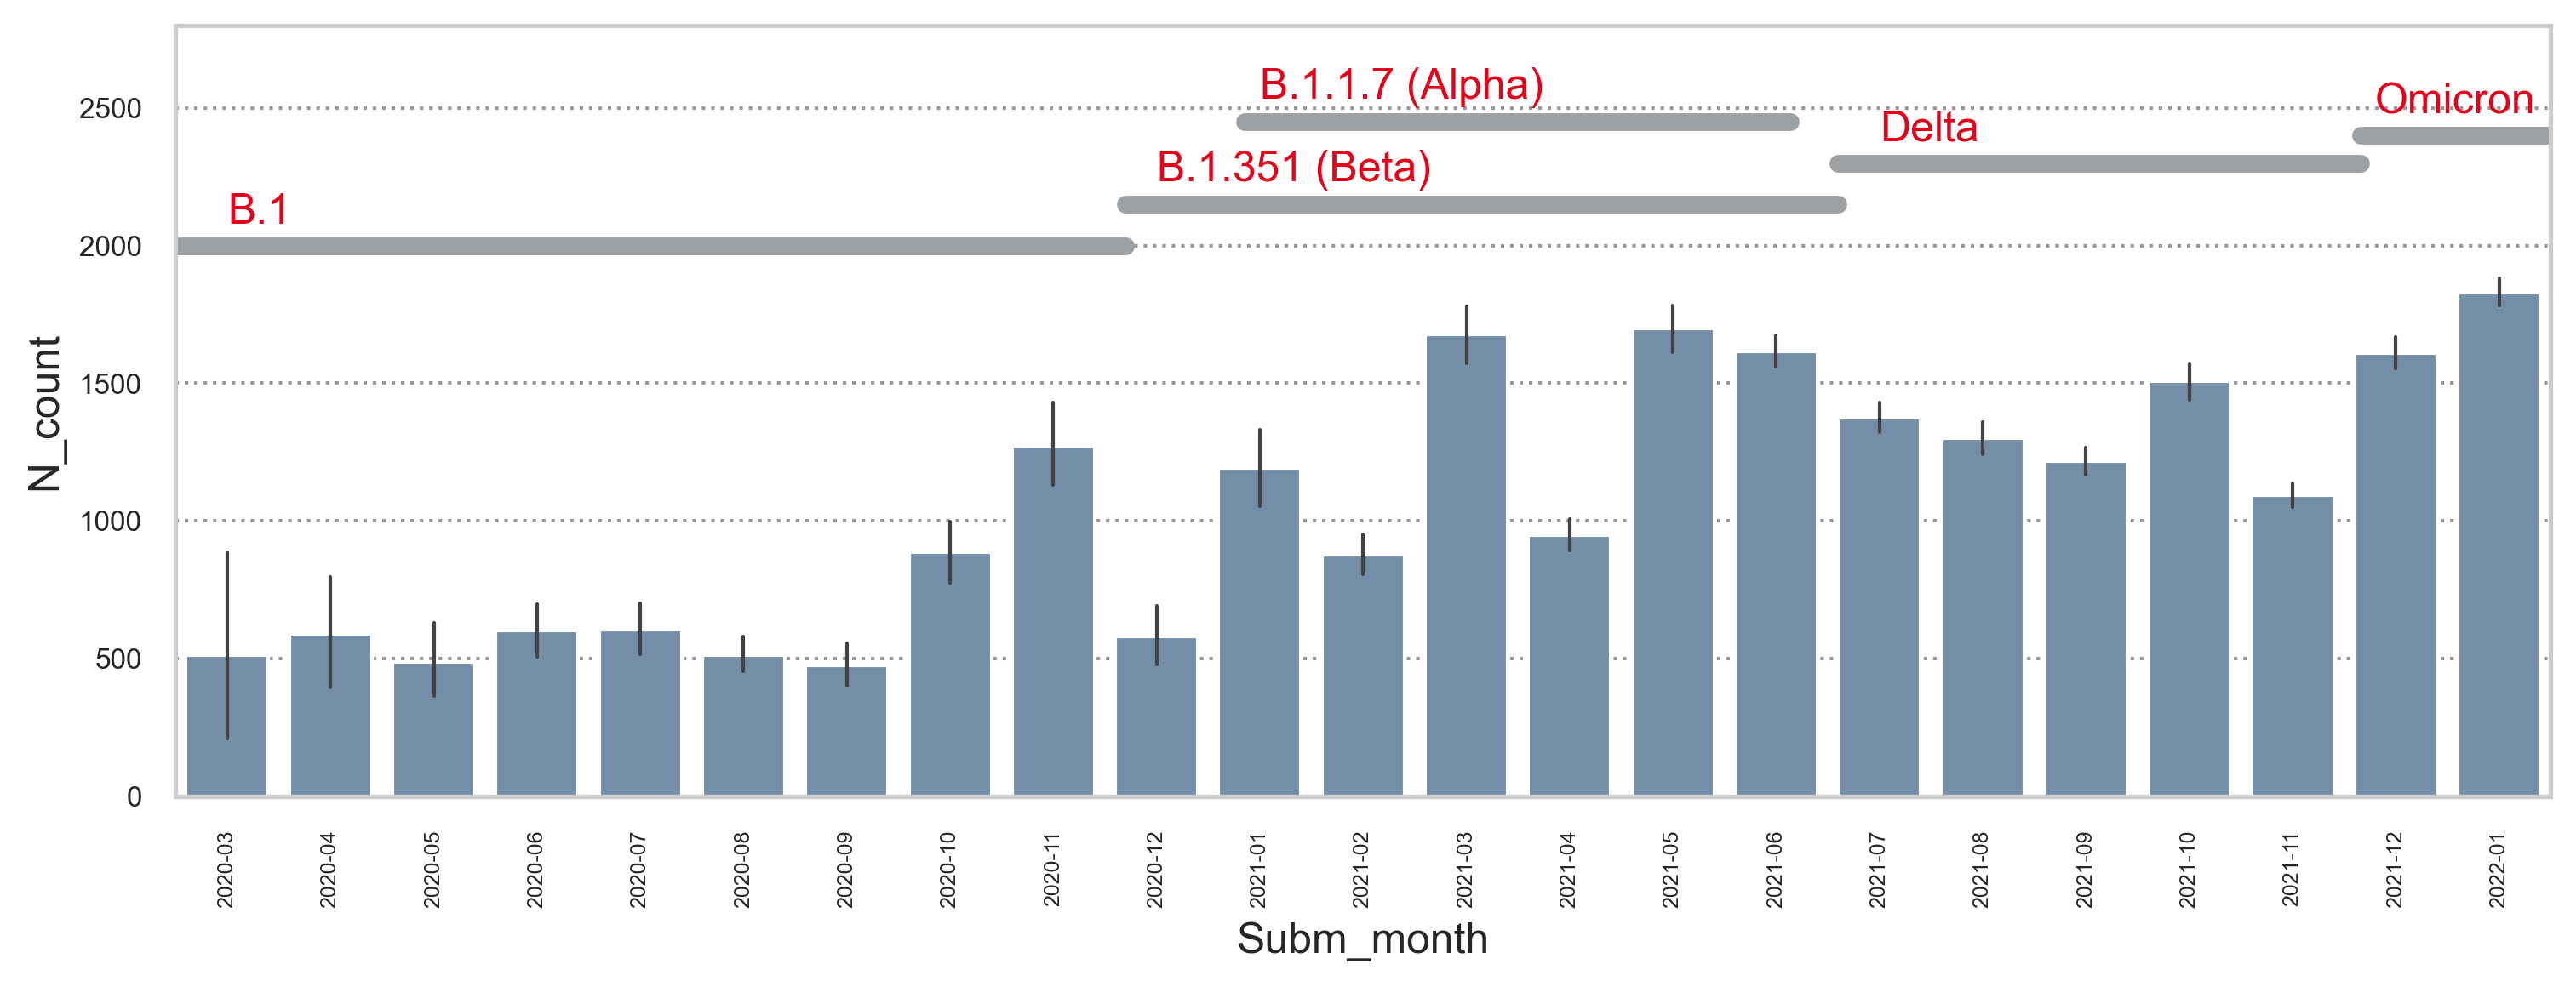

In [8]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Subm_month", y="N_count", errwidth=1,order = month_order, color = "#6b8eae")
ax.set_ylim(0, 2800)

#Annotate
ax.text(0, 2050, "B.1", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2000, xmin=0, xmax=0.4, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(9, 2200, "B.1.351 (Beta)", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2150, xmin=0.4, xmax=0.7, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(16, 2350, "Delta", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2300, xmin=0.7, xmax=0.92, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(20.8, 2450, "Omicron", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2400, xmin=0.92, xmax=1, linewidth=5, color="#9ea1a3",linestyle='-')

ax.text(10, 2500, "B.1.1.7 (Alpha)", fontsize=12, va="bottom", color="#e2041b", rotation=0)
ax.axhline(y=2450, xmin=0.45, xmax=0.68, linewidth=5, color="#9ea1a3",linestyle='-')

plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_subm_month.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_subm_month.jpg',bbox_inches="tight", dpi= 300)

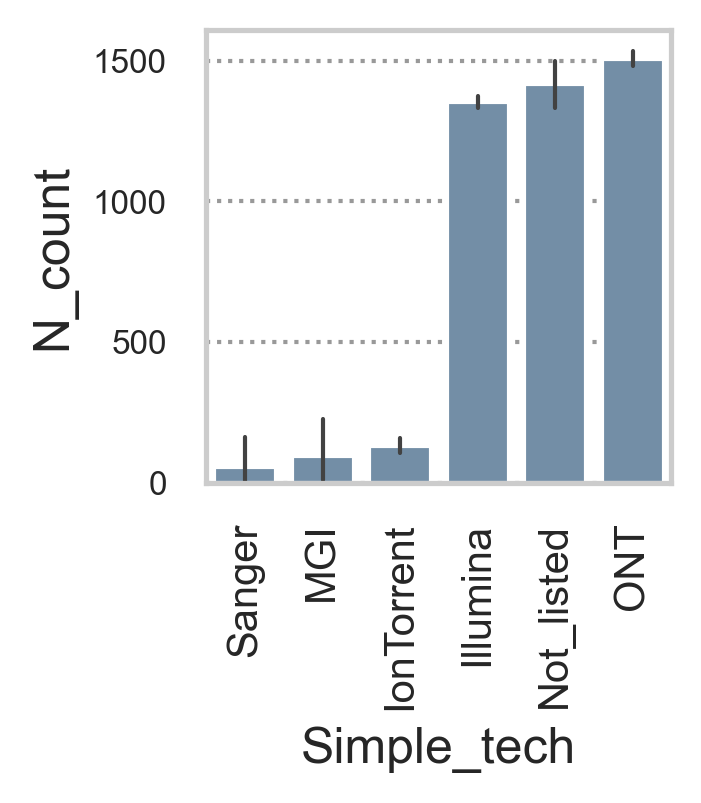

In [9]:
tech_order = ['Sanger', 'MGI', 'IonTorrent', 'Illumina', 'Not_listed', 'ONT']
sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

ax.set_ylim(0, 1800)
ax = sns.barplot(data=df1, x="Simple_tech", y="N_count", color = "#6b8eae", errwidth=1, order = tech_order)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_tech.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_tech.jpg',bbox_inches="tight", dpi= 300)

In [10]:
df['Primers_used'].value_counts()

NameError: name 'df' is not defined

In [ ]:
primer_order = ['AviSeq','Random_hexamers','Entebbe','ARTIC_V2','IonTorrent_AmpliSeq','Midnight','Not_listed','ARTIC_V3']
                

In [ ]:
sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Primers_used", y="N_count", color = "#6b8eae", errwidth=1, order = primer_order)

ax.set_ylim(0, 1800)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_primers.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_primers.jpg',bbox_inches="tight", dpi= 300)

In [ ]:
df1['Country'].value_counts()

In [ ]:
df4 = df1.groupby('Country').agg({'N_count': ['mean','median','min','max']})
# need to flatten columns
df5 = (df4.droplevel(0,axis=1))
df5["Country"]= df5.index
df5_ordered = df5.sort_values(by=['mean'], ascending=[True])
country_order = list(df5_ordered["Country"])
country_order

In [ ]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=df1, x="Country", y="N_count", color = "#6b8eae", errwidth = 1, order = country_order)
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.savefig(outprefix+'_Nmean_by_country.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_country.jpg',bbox_inches="tight", dpi= 300)

In [ ]:
lineage_count_dict = (df['Lineage'].value_counts()).to_dict()
# lineage_count_dict
lineage_count_dict_gre300 = {k:v for (k,v) in lineage_count_dict.items() if v >= 300}
lineage_count_gre300_list = list(lineage_count_dict_gre300.keys())

In [ ]:
# retain only lineages gre300
df1_gre300 = df1[df1['Lineage'].isin(lineage_count_gre300_list)]
df1_gre300.head()

In [ ]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

ax = sns.barplot(data=df1_gre300, x="Lineage", y="N_count", color = "#6b8eae", errwidth=1, order = gre300_lineage_order)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.title(outprefix+'_mean, by lineage (lineage freq >= 300)')
plt.savefig(outprefix+'_Nmean_by_lineage_gre300.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Nmean_by_lineage_gre300.jpg',bbox_inches="tight", dpi= 300)